# k-means algorithm

### How to use Kmeans?


```python
Kmeans(number_of_points, dimentions)
```
***Parameters:***  
    - number_of_points - the number of points to be generated randomally.
    
    - dimentions [optional] - the number of dimentions for each point (2=2d, 3=3d)

***Attributes:***  
    - Kmeans.cluster(number_of_clusters)
    
        number_of_clusters - the number of clusters to look for

### Examples
```python
# instantiate the class with 200 random points
clusters = Kmeans(200)

# find 5 clusters
clusters.cluster(5)
```

In [230]:
import numpy as np
import matplotlib.pyplot as plt

class Kmeans:

    def __init__(self, number_of_points, dimentions=2):
        self.number_of_points = number_of_points
        self.dimentions = dimentions
        
        self.points = np.zeros((number_of_points, dimentions))
        for i in range(number_of_points):
            self.points[i] = (np.random.randint(100, size=1)[0],np.random.randint(100, size=1)[0])

    
    
    def __init_centers(self):
        self.centers = np.zeros((self.number_of_clusters, self.dimentions))
        
        for i in range(self.number_of_clusters):
            self.centers[i] = (np.random.randint(100, size=1)[0],np.random.randint(100, size=1)[0])

    
    
    def __init_assign_labels(self):
        for p in range(self.number_of_points):
            closest_distance = np.sqrt(np.sum((self.points[p]-self.centers[0])**2))
            for c in range(self.number_of_clusters):
                if closest_distance > np.sqrt(np.sum((self.points[p]-self.centers[c])**2)): # could also be done using np.linalg.norm
                    self.labels[p] = c
                    closest_distance = np.sqrt(np.sum((self.points[p]-self.centers[c])**2))
        
        return
    
    
    def __assign_labels(self, old_labels):
        
        self.labels_prev = np.copy(self.labels)
        
        for p in range(self.number_of_points):
            closest_distance = np.sqrt(np.sum((self.points[p]-self.labels[p])**2))
            for c in range(self.number_of_clusters):
                if closest_distance > np.sqrt(np.sum((self.points[p]-self.centers[c])**2)):
                    self.labels[p] = c
                    closest_distance = np.sqrt(np.sum((self.points[p]-self.centers[c])**2))

        compare = self.labels_prev == self.labels
        is_no_change = True
        
        for c in compare:
            if c == False:
                is_no_change = False
                break
                
        return is_no_change

        
    def __recenter(self):
        
        new_centers = np.zeros(self.centers.shape)
        cluster_points_count = np.zeros(self.number_of_clusters)

        for c in range(self.number_of_points):
            new_centers[int(self.labels[c])] = new_centers[int(self.labels[c])] + self.points[c]
            cluster_points_count[int(self.labels[c])]+=1
            
        for c in range (self.number_of_clusters):
            self.centers[c] = new_centers[c] / cluster_points_count[c]
        
        return
    
    
    
    def cluster(self, number_of_clusters=2):
        self.number_of_clusters = number_of_clusters
        self.__init_centers()
        self.labels = np.zeros(self.number_of_points)
        self.labels_prev = np.zeros(self.number_of_points)
        self.__init_assign_labels()
        
        end = False
        
        while end == False:
            end = self.__assign_labels(self.labels)
            self.__recenter()

        return self.labels, self.centers

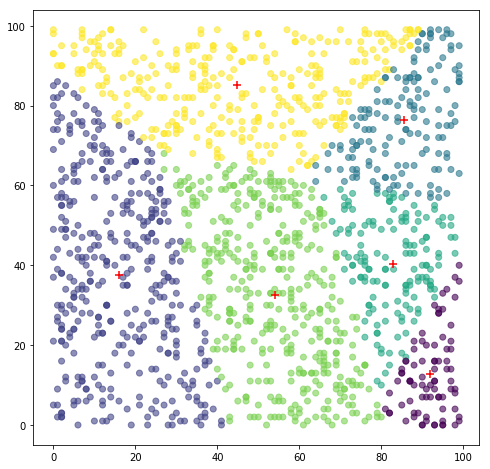

In [241]:
clusters = Kmeans(1500)
labels, centers = clusters.cluster(6)

plt.figure(0).set_size_inches(8,8)
plt.scatter(clusters.points[:,0], clusters.points[:,1], c=labels, alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='red', marker="+", s=80)
plt.show()